# Macroeconomics III: Problem Set 2

Student: Rafael F. Bressan

## 1. Stochastic Processes

(a) Explain in detail the procedures to approximate an $\mathrm{AR}(1)$ process
$$
y_{t}=\mu(1-\rho)+\rho y_{t_{1}}+\epsilon_{t}
$$
where $\epsilon_{t} \sim N\left(0, \sigma^{2}\right)$ with a Markov chain, based on the Tauchen method (with equal intervals).

The objective when approximating a stochastic process, such as an AR(1), by a Markov chain is to discretize the values that this process can assume. A first order Markov Chain of dimension $n$ is characterized by the state space $z \in Z = [z_1, \ldots , z_n]$ which are the values that the process can assume and by a transition matrix $P_{nxn}$ which indicates the probability that the process assume a certain value given the previous value of the process, that is, $P_{ij} = Pr(z_{t=1}=z_j|z_t = z_i)$.

Specifically, Tauchen's method will postulate rules on how to define this grid/state space of the Markov process and how to compute the transition matrix. The method's boundary grid values $z_1$ and $z_n$ are defined from the mean plus or minus $r$ standard deviations of the process to be estimated. So, for an AR(1) process they are given by:

$$
\begin{equation}
z_{1}=\mu-r \sqrt{\frac{\sigma^{2}}{1-\rho^{2}}}, \quad z_{N}=\mu+r \sqrt{\frac{\sigma^{2}}{1-\rho^{2}}}
\end{equation}
$$

The rest of the grid values $[z_2, \ldots, z_{n−1}]$ are defined such that they are all equidistant. To calculate the transition matrix we need to make a transformation that suits the fact that the Markov process is discrete while the process we want to approximate is continuous. If we calculated the probability of a given value in state space Z occurring it would be zero, because the random part of the AR(1) process is a continuous distribution. So we have to create intervals which will be responsible for marking the probabilities in the transition matrix. Particularly, in Tauchen's method, these intervals are defined by the midpoints of the values in the state-space grid. The first and last value the range extends to $\pm\infty$.

For a given point $z_i$ in state-space Z its interval is given by,
$$
\begin{equation*}
z_{i} \in\left\{\begin{array}{ll}
\left(-\infty, m_{1}\right] & \text { if } i=1 \\
\left(m_{i-1}, m_{i}\right] & \text { if } 1<i<N \\
\left(m_{N-1}, \infty\right) & \text { ifi }=N
\end{array}\right.
\end{equation*}
$$

where $m_i$ is the middle-point between two consecutive grid points.

Once we have the intervals in the state-space grid, one can compute the probabilities entries of the transition matrix $P$ as:

$$
\begin{align}
\pi_{i1}&=\Phi(\frac{m_1-\rho z_i-\mu(1-\rho)}{\sigma})\\
\pi_{iN}&=1-\Phi(\frac{m_{N-1}-\rho z_i-\mu(1-\rho)}{\sigma})\\
\pi_{ij}&=\Phi(\frac{m_{j}-\rho z_i-\mu(1-\rho)}{\sigma})-\Phi(\frac{m_{j-1}-\rho z_i-\mu(1-\rho)}{\sigma})
\end{align}
$$


(b) Use the code sent to you to generate and plot $T=1000$ realisations from a Markov chain approximation of the AR(1) process
$$
y_{t}=0.8 y_{t-1}+\epsilon_{t},
$$

where $\epsilon_{t} \sim N(0,0.01)$. To generate the realisations, use as initial state of the chain the one that best approximates $y_{0}=0$, and use $r=3$. Do the following experiments (remember to always use the same seed):

i. Start by generating the series using $N=3$ grid points for the approximation. What do you observe? Why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm
%matplotlib inline

plt.rc('figure', figsize=(10, 6))

#Função que calcula a cadeia de markov
def tauchen(rho, mu, sigma_2, N, r):
    #Definindo o grid
    z_1 = mu - r*np.sqrt(sigma_2/(1-rho**2))
    z_N = mu + r*np.sqrt(sigma_2/(1-rho**2))
    Z = np.linspace(z_1, z_N, N)
    # ~ print(Z)
    
    #Definindo os intervalos para calculo das probabilidades
    M = np.empty(N-1)
    for i in np.arange(M.size):
        M[i] = (Z[i] + Z[i+1])/2
    # ~ print(M)
    
    #Computando a Matriz de Transição
    P = np.ones(N*N).reshape(N,N)
    # j = 1
    for i in np.arange(N):
        P[i][0] = norm.cdf((M[0]-rho*Z[i]-mu*(1-rho))/sigma_2**0.5)
    # j = N
    for i in np.arange(N):
        P[i][N-1] = 1 - norm.cdf((M[N-2]-rho*Z[i]-mu*(1-rho))/sigma_2**0.5)
    # j = 2,..,N-1
    for j in np.arange(1,N-1):
        for i in np.arange(N):
            P[i][j] = norm.cdf((M[j]-rho*Z[i]-mu*(1-rho))/sigma_2**0.5) - norm.cdf((M[j-1]-rho*Z[i]-mu*(1-rho))/sigma_2**0.5)
    # Retorna o grid e matriz de transição
    return P, Z

In [2]:
# Simulating the Markov Chain
def markovsimul(PI,s,n,s0, rng=np.random.default_rng(12345)):
    """Simulate a Markov chain

    Args:
        PI (np.array): Transition matrix
        s (np.array): State vector
        n (int): Length of simulation
        s0 (int): Index of initial state
    """
    state=np.zeros(n, dtype='int32')
    state[0]=s0
    # Computing the cumulative distribution
    cumpi=np.cumsum(PI, axis=1)
    # Simulate probs from uniform
    sim=rng.random(n) 
    # Simulate the next states
    for i in range(1, n):
        state[i] = np.argmax(np.less_equal(sim[i], cumpi[state[i-1]]))
        
    # Return state
    return s[state]

#Generating the AR process 
def AR_1(mu, rho, sigma2, T, rng=np.random.default_rng(12345)):
    y=np.zeros(T)
    e=rng.normal(0, np.sqrt(sigma2), T)
    for i in range(T-1):
        y[i+1]= mu + rho*y[i]+e[i+1]
    return y

In [3]:
# Simulate the above AR(1)
N = 3
r = 3
rho = 0.8
mu = 0
sigma2 = 0.01
T = 1000
y0 = 0
# AR(1) process
ar1=AR_1(mu, rho, sigma2, T)
# Markov approximation
PI, Z = tauchen(rho, mu, sigma2, N, r)
s0 = np.argmax(y0 == Z)
mkv3 = markovsimul(PI, Z, T, s0)

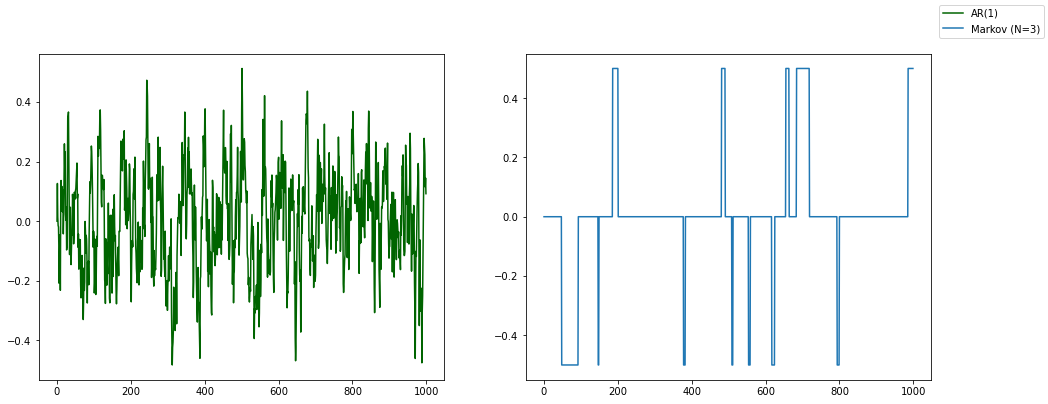

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].plot(ar1, color='darkgreen', label='AR(1)')
ax[1].plot(mkv3, label='Markov (N=3)')
fig.legend()

We see that with $N = 3$ we have a very bad approximation of the process, and this is due to the very low number of points on the grid. As a result, the graph makes it very apparent that the approximation is a discrete variable.


ii. Next, use $N=7$ and $N=15$ and compare how the results differ in terms of quality of approximation.


In [5]:
# Markov approximation
PI7, Z7 = tauchen(rho, mu, sigma2, 7, r)
s07 = np.argmax(y0 == Z7)
mkv7 = markovsimul(PI7, Z7, T, s07)

# Markov approximation
PI15, Z15 = tauchen(rho, mu, sigma2, 15, r)
s015 = np.argmax(y0 == Z15)
mkv15 = markovsimul(PI15, Z15, T, s015)

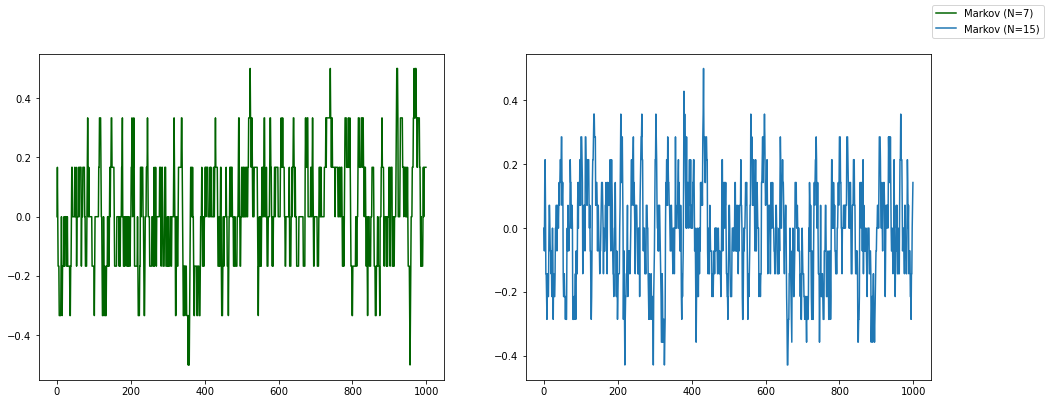

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].plot(mkv7, color='darkgreen', label='Markov (N=7)')
ax[1].plot(mkv15, label='Markov (N=15)')
fig.legend()

Notice how the increase of the number of points in grid, up to $N = 7$ or $N = 15$, the plots are now much closer to the AR(1) benchmark process.

## 2. RBC Model. 
Consider the following full RBC model:
$$
\max _{c_{t}, k_{t+1}, h_{t}} E_{0}\left(\sum_{t=0}^{\infty} \beta^{t} u\left(c_{t}, 1-h_{t}\right)\right)
$$
subject to
$$
\begin{array}{c}
c_{t}+k_{t+1}=z_{t} F\left(k_{t}, h_{t}\right)+(1-\delta) k_{t}, \\
\ln \left(z_{t+1}\right)=\rho \ln \left(z_{t}\right)+\epsilon_{t+1}, \epsilon_{t+1} \sim N\left(0, \sigma^{2}\right)
\end{array}
$$

The technology is given by
$$
Y_{t}=z_{t} F\left(k_{t}, h_{t}\right)=z_{t} k_{t}^{\alpha} h_{t}^{1-\alpha}
$$
The first and second welfare theorems hold for this economy, therefore you can solve the social planner's problem. If needed you can recover prices using marginal productivities. Assume also that:
$$
u(c, 1-h)=\frac{\left(c^{\gamma}(1-h)^{1-\gamma}\right)^{1-\mu}}{1-\mu}
$$

(a) Write down the decentralized equilibrium and define the Recursive Competitive Equilibrium.

Following Prescott and Mehra (1980), we define the recursive competitive equilibrium as:

1. The representative agent’s problem is characterized by the Bellman equation

$$
\begin{align}
V(k, z)&=\max_{c, h}\{u(zF(k,h)+(1-\delta)k-k', 1-h)+\beta \mathbb{E}V(k', z')\}\\
s.t.: c+k'&=zF(k,h)+(1-\delta)k \\
\ln(z')&=\rho\ln(z)+\varepsilon'
\end{align}
$$

2. Firms maximize profits

$$
\begin{equation}
\max_{k_t, h_t}\Pi_t = z_tF(k_t, h_t)-w_th_t - r_tk_t
\end{equation}
$$

3. Beliefs of the aggregate state evolution match the actual evolution

Then we have the **definition** of a recursive competitive equilibrium.

> Definition: A recursive competitive equilibrium is a policy function $h$, an actual aggregate law of motion $G_A$, and a perceived aggregate law $G$ such that (a) given $G$, $h$ solves the representative agent’s optimization problem; and (b) $h$ implies that $G_A = G$.

This equilibrium concept is also called a **rational expectations equilibrium**.

(b) Write down the Social Planner's problem in recursive formulation.

The social planner's problem is to maximize a representative household utility and a representative firm profit, such that those representative agents hold all the capital, supply all labor and consume all goods in the economy. We denote the aggregate quantities in uppercase letters. The planning problem is then, defined in recursive formulation:

$$
\begin{align}
Vh(K, Z)&=\max_{C, H}\{u(ZF(K,H)+(1-\delta)K-K', 1-H)+\beta \mathbb{E}V(K', Z')\}\\
s.t.: C+K'&=ZF(K,H)+(1-\delta)K \\
\ln(Z')&=\rho\ln(Z)+\varepsilon'
\end{align}
$$

$$
\begin{equation}
Vf(K, Z)=\max_{K, H}ZF(K, H)-wH-rK
\end{equation}
$$

Calibration: Now, we need to set the value of the model parameters. In practice these numbers are based on data moments and there is a large literature on this. For now, use $\beta=0.987, \mu=2$. For the production function assume that $\alpha=1 / 3$ and $\delta=0.012$.

(c) Assume that the model period is a quarter, explain the intuition behind the value of each parameter above.

As the model period is a quarter, it means that the individual will have a discount factor of $\beta$ to next quarter utility. This approximates to a 0.95 annual discount. Capital will depreciate at a rate of $\delta$ every quarter. Note that this seemingly arbitrary amount when converted to an annual rate consists of a capital depreciation of approximately 5% per year.

(d) For now, assume that there is no uncertainty (i.e., $\sigma=0$ ). Derive the Euler Equation and the intra-temporal condition. Calibrate $\gamma$ such that hours worked in the model is $1 / 3$ of the time endowment in the steady-state, i.e., $\mathrm{h}=1 / 3$.
Calibration (cont.): Now, for the stochastic productivity process, assume the values of Cooley and Prescott (1985): $\rho=0.95$ and $\sigma=0.007$.

From the recursive equilibrium definition, the household's problem is given by equations (5) to (7) and the Lagrangean of this problem is:

$$
\begin{equation}
\mathcal{L}=\max_{c,h,k'}\{u(c,1-h)+\beta\mathbb{E}V(k', z')\}+\lambda_1\left[zF(k,h)+(1-\delta)-c-k'\right]+\lambda_2\left[\rho\ln(z)-\ln(z')\right]
\end{equation}
$$

First order conditions and the Benveniste-Scheinkman formula will give us the Euler equation and the intra-temporal labor-leisure substitution. Let us first derive the partial derivative of the value function with relation to $k$.

$$
\begin{equation}
V_k(k, z)=u_c(c, 1-h)\left[zF_k(k,h)+(1-\delta)\right]
\end{equation}
$$
where $u_c$ and $F_k$ are the partial derivatives of utility wrt. consumption and the production function wrt. capital, respectively. Then, the FOC are:

$$
\begin{align}
\mathcal{L}_c: &u_c(c, 1-h)-\lambda_1=0\\
\mathcal{L}_h: &-u_l(c, 1-h)+\lambda_1zF_h(k, h)=0\\
\mathcal{L}_{k'}: &\beta\mathbb{E}\left[V_k(k', z')\right]-\lambda_1=0
\end{align}
$$

Labor-leisure substitution: $u_c(c, 1-h)zF_h(k, h)=u_l(c, 1-h)$

Euler Equation: $\beta\mathbb{E}\left[u_c(c', 1-h')\left[z'F_k(k', h')+1-\delta\right]\right]=u_c(c, 1-h)$

Notice that: 
$$
\begin{align}
u_c&=\gamma\left[c^\gamma(1-h)^{1-\gamma}\right]^{-\mu}(c/1-h)^{\gamma-1}\\
u_l&=(1-\gamma)\left[c^\gamma(1-h)^{1-\gamma}\right]^{-\mu}(c/1-h)^\gamma\\
F_k&=\alpha k^{\alpha-1}h^{1-\alpha}\\
F_h&=(1-\alpha)k^\alpha h^{-\alpha}
\end{align}
$$

Therefore we have that:

$$
\begin{align}
\frac{c}{1-h}&=\frac{\gamma}{1-\gamma}(1-\alpha)z\left(\frac{k}{h}\right)^\alpha\\
\beta\mathbb{E}&\lbrace\left[(c'/c)^\gamma(1-h'/1-h)^{1-\gamma}\right]^{-\mu}\left[(c'/c)/(1-h'/1-h)\right]^{\gamma-1}\left(\alpha z'k'^{\alpha-1}h'^{1-\alpha}+1-\delta\right)\rbrace=1\\
w_t&=z_t(1-\alpha)(k_t/h_t)^\alpha\\
r_t&=z_t\alpha(k_t/h_t)^{\alpha-1}\\
c_t+k_{t+1}&=z_tk_t^\alpha h_t^{1-\alpha}
\end{align}
$$

In steady state we can solve the following equations to calibrate the appropriate $\gamma$ value:

$$
\begin{align}
r_{ss}&=\frac{1-\beta(1-\delta)}{\beta}\\
\frac{k_{ss}}{h_{ss}}&=\left(\frac{r_{ss}}{\alpha z}\right)^{1/\alpha-1}\\
\frac{c_{ss}}{h_{ss}}&=z\left(\frac{k_{ss}}{h_{ss}}\right)^\alpha-\delta\left(\frac{k_{ss}}{h_{ss}}\right)\\
\frac{c_{ss}}{h_{ss}}&=z\frac{\gamma}{1-\gamma}(1-\alpha)\left(\frac{k_{ss}}{h_{ss}}\right)^\alpha\left(\frac{1}{h_{ss}}-1\right)
\end{align}
$$

In [7]:
from scipy.optimize import root

def obj_gamma(gamma, alpha, beta, delta, z, hss):
    r = (1/beta)*(1-beta*(1-delta))
    kh = (r/(alpha*z))**(1/(alpha-1))
    ch = z*kh**alpha-delta*kh
    return z*(gamma/(1-gamma))*(1-alpha)*kh**alpha*(1/hss - 1) - ch

# Parameters given
alpha, beta, delta, z, hss = 1/3, 0.987, 0.012, 1, 1/3
gamma_d=root(obj_gamma, 0.5, args=(alpha, beta, delta, z, hss))
gamma_d.x[0]

0.386810149076908

(e) Now assume that there is uncertainty. Solve the model using the value function algorithm. Use the method of Tauchen (1986) with 7 grid points. For the capital grid you can use a linear grid with 101 points in the interval from $\left[0.75 k_{s s}, 1.25 k_{s s}\right]$. Report the number of value function iteration, the time it takes to find the optimal value function, plot figure of the policy function and calculate Euler Errors.

In [18]:
from time import time
from scipy.stats import norm

class Markov():
    
    def __init__(self,rho,sigma,mu,r,N):
        self.rho,self.sigma,self.mu,self.r,self.N = \
        rho,sigma,mu,r,N
        
    def get_grid(self):
        sigma_z = self.sigma/np.sqrt(1-self.rho**2)
        
        #Grid for z
        z= np.zeros(self.N)
    
        #Bounds
        z[0] = self.mu - self.r*sigma_z
        z[N-1] = self.mu + self.r*sigma_z
        
        #Grid distance
        d = (z[N-1]-z[0])/(self.N-1)
    
        #Values for the grid
        for i in range(1,self.N):
            z[i] = z[i-1]+d
        
        #Borders
        b = np.zeros(self.N-1)
        for i in range(0,self.N-1):
            b[i]=z[i]+d/2
        
        return z, b
    
    def get_transition_matrix(self,z,b):
        
        #Trans matrix
        Pi = np.zeros((self.N,self.N))
        
        #Calculating j=1 and j=N cases
        for i in range(0,self.N):
            Pi[i,0] = norm.cdf((b[0]-self.rho*z[i]-self.mu*(1-self.rho))/self.sigma)
            
            for i in range(0,self.N):
                Pi[i,self.N-1] = 1 - norm.cdf((b[self.N-2]-self.rho*z[i]-self.mu*(1-self.rho))/self.sigma)
                
                #Calculating intermediary grid cases
                for j in range(1,self.N-1):
                    for i in range(0,self.N):
                        Pi[i,j] = norm.cdf((b[j]-self.rho*z[i]-self.mu*(1-self.rho))/self.sigma) \
                        - norm.cdf((b[j-1]-self.rho*z[i]-self.mu*(1-rho))/self.sigma)
    
        return Pi
                                
class FullRBC():
    
    #Parameters. gridz is given in terms of logarithm
    def __init__(self,alpha,beta,delta,mu,Pi,gridz,zss,gamma):
        self.alpha, self.beta, self.delta, self.mu, self.Pi, self.gridz, self.zss, self.gamma = \
        alpha,beta,delta,mu,Pi,gridz,zss,gamma
        # Steady state
        self.css = self.kss = self.hss = self.rss = None
        self.gridk = None 
        # Other grids
        self.h = self.c = self.u = None
        # Solution
        self.V = self.index = self.policy = None 
        
    #Steady State
    def solve_ss(self) -> None:
        gamma, alpha, beta, delta, zss = self.gamma, self.alpha, self.beta, self.delta, self.zss
        
        def obj_hss(hss, gamma, alpha, beta, delta, zss):
            r = (1/beta)*(1-beta*(1-delta))
            kh = (r/(alpha*zss))**(1/(alpha-1))
            ch = zss*kh**alpha-delta*kh
            return zss*(gamma/(1-gamma))*(1-alpha)*kh**alpha*(1/hss - 1) - ch
        
        res = root(obj_hss, 0.33, args=(gamma, alpha, beta, delta, zss))
        hss = res.x[0]
        rss = (1/beta)*(1-beta*(1-delta))
        kh = (rss/(alpha*zss))**(1/(alpha-1))
        kss = kh*hss
        ch = zss*kh**alpha-delta*kh
        css = ch*hss
        self.css, self.kss, self.hss, self.rss = css, kss, hss, rss

    def get_ss(self):
        return {'css': self.css, 'hss': self.hss, 'kss': self.kss, 'rss': self.rss}        
        
    # def compute_kss(self):
    #     kss = (self.hss)*((self.zss*(self.alpha)*self.beta)/(1-self.beta*(1-self.delta)))**(1/(1-self.alpha))
    #     return kss
    
    #Grid for k
    def create_gridk(self,lower,upper,n) -> None:
        kss = self.kss
        self.gridk = np.linspace(lower*kss, upper*kss, n)
    
    def get_gridk(self):
        return self.gridk
    #Gama
    # def compute_gamma(self):
    #     kss = self.compute_kss()
    #     gamma = 1/(1+((1-self.hss)/(kss*(self.zss*(self.hss/kss)**(1-self.alpha)-self.delta))*(self.zss*(1-self.alpha) \
    #                    *(self.hss/kss)**(-self.alpha))))
    #     return gamma

    #H
    def h_function(self,h1,k1,z1,k2):
        f = (self.gamma/(1-self.gamma)*(1-h1)*(np.exp(z1)*(1-self.alpha)*(h1/k1)**(-self.alpha))) - np.exp(z1)*(k1**(self.alpha))*(h1**(1-self.alpha))-(1-self.delta)*k1+k2
        return f
    
    #The optimal h grid from the k,z grid
    def calculate_h(self) -> None:
        # start_time = time.time()
        #Calculating possible h values for each grid point k1,z1,k2
        #initial guess for h
        h0 = 1e-6
        h = np.zeros((len(self.gridk),len(self.gridz),len(self.gridk)))
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                for k2 in range(len(self.gridk)):
                    h[k1,z1,k2] = root(self.h_function,h0,args=(self.gridk[k1],self.gridz[z1],self.gridk[k2])).x[0]
        # elapsed = round(time.time() - start_time)
        # print(f"\n Time elapsed for calculating h: {elapsed}s")
        self.h = h
    
    #The optimal c grid from the k,z,h grid
    def calculate_c(self) -> None:
        c = np.zeros((len(self.gridk),len(self.gridz),len(self.gridk)))
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                for k2 in range(len(self.gridk)):
                    c[k1,z1,k2] = np.exp(self.gridz[z1])*self.gridk[k1]**self.alpha*self.h[k1,z1,k2]**(1-self.alpha) + (1-self.delta)*self.gridk[k1] - self.gridk[k2]
        self.c = c
        
    #Utility
    def calculate_u(self) -> None:
        u = np.zeros((len(self.gridk),len(self.gridz),len(self.gridk)))
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                for k2 in range(len(self.gridk)):
                    if self.h[k1,z1,k2]>1:
                        u[k1,z1,k2]=-float('inf')
                    else:
                        u[k1,z1,k2] = (self.c[k1,z1,k2]**self.gamma*(1-self.h[k1,z1,k2])**(1-self.gamma))**(1-self.mu)/(1-self.mu)
        self.u = u
    
    #One iteration of Value Function operator
    def value_function_operator(self,V,h):
        
        #Empty list for the k and z grid
        Aux = np.zeros((len(self.gridk),len(self.gridz),len(self.gridk)))
        
        #Filling an auxiliary list from which max will be selected for the new V
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                for k2 in range(len(self.gridk)):
                    if self.c[k1,z1,k2]>0 and self.h[k1,z1,k2]<1 and self.h[k1,z1,k2]>=0:
                        E = 0
                        for z2 in range(len(self.gridz)):
                            E = E+self.Pi[z1,z2]*V[k2,z2]
                        Aux[k1,z1,k2] = self.u[k1,z1,k2] + self.beta*E
                    else:
                        Aux[k1,z1,k2] = -float('inf')
        
        #Picking maximum Aux for each pair (k1,z1)
        V_new = np.zeros((len(self.gridk),len(self.gridz)))
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                V_new[k1,z1]=np.amax(Aux[k1,z1,:])
        
        #Picking index of maximum Aux for each pair (k1,z1)
        index = [[0] * len(self.gridz) for i in range(len(self.gridk))]
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                index[k1][z1] = np.argwhere(Aux[k1,z1,:] == np.amax(Aux[k1,z1,:]))[0][0]
                
        #Defining policy image
        policy = [[0] * len(self.gridz) for i in range(len(self.gridk))]
        for k1 in range(len(self.gridk)):
            for z1 in range(len(self.gridz)):
                policy[k1][z1] = self.gridk[index[k1][z1]]
        
        return V_new, index, policy, Aux

    #loop for iterations
    def value_function_iteration(self,maxit=100000,tol=1e-6,printskip=10,showlog=True,howard=False,howard_step=20) -> None:
        #Setting up cronometer
        start_time = time()
        #Initializing Value Function
        V = np.zeros((len(self.gridk),len(self.gridz)))
        #Initializing counter
        i = 0
        #Initializing error
        error = tol+1
        
        #Creating loop for iteration
        while i<maxit and error>tol:
            V_new, index, policy, Aux = self.value_function_operator(V, self.h)
            
            if howard:
                for count in range(0,howard_step):
                    V_old = V_new
                    for k1 in range(len(self.gridk)):
                        for z1 in range(len(self.gridz)):
                            E = 0
                            for z2 in range(len(self.gridz)):
                                E = E+self.Pi[z1,z2]*V_old[index[k1][z1],z2]
                            V_new[k1,z1] = self.u[k1,z1,index[k1][z1]] + self.beta*E
            
            error = np.amax(np.abs(V_new-V))
            i = i+1
            if showlog and i % printskip == 0:
                print(f"Error at iteration {i} is {error}")
                # hour = round(((time.time() - start_time)/60)//60)
                # minute = round((time.time() - start_time)//60 - hour*60)
                # second = round((time.time() - start_time) - hour*60*60 - minute*60)
                # print(f"\n Time elapsed: {hour}h {minute}min {second}s")
            V = V_new
            
        secs = time() - start_time
        
        if i == maxit:
            print(f"Maximum of {maxit} iterations reached")
        
        if error<tol:
            print(f"Converged in {i} iterations")
        
        print(f"Time elapsed: {secs} seconds.")
        self.V = V
        self.policy = policy
        self.index = index
    
    def get_index(self):
        return self.index
    
    def get_policy(self):
        return self.policy
    
    def get_V(self):
        return self.V
        
    # Simulating the Markov Chain
    def markovsimul(self, PI,s,n,s0, rng=np.random.default_rng(12345)):
        """Simulate a Markov chain

        Args:
            PI (np.array): Transition matrix
            s (np.array): State vector
            n (int): Length of simulation
            s0 (int): Index of initial state
        """
        state=np.zeros(n, dtype='int32')
        state[0]=s0
        # Computing the cumulative distribution
        cumpi=np.cumsum(PI, axis=1)
        # Simulate probs from uniform
        sim=rng.random(n) 
        # Simulate the next states
        for i in range(1, n):
            state[i] = np.argmax(np.less_equal(sim[i], cumpi[state[i-1]]))
            
        # Return state s and associated index as a list
        return s[state], state
    
    def simulate_path(self, PI, s, n, s0):
        
        c = np.ones(n)
        h = np.ones(n)
        k = np.ones(n+1)
        I = np.ones(n)
        y = np.ones(n)
        k_pos = np.ones(n+1, dtype='int32')
        
        z = self.markovsimul(PI, s, n, s0)[1]
        
        # Valores iniciais. K0 = Kss
        # k_pos[0] = np.random.choice(np.arange(len(self.gridk)))
        k_pos[0] = np.argmax(self.kss == self.gridk)
        k[0] = self.gridk[k_pos[0]]
        
        for t in np.arange(1,n+1):
            k[t] = self.policy[k_pos[t-1]][z[t-1]]
            k_pos[t] = self.index[int(k_pos[t-1])][int(z[t-1])]
            c[t-1] = self.c[int(k_pos[t-1])][int(z[t-1])][int(k_pos[t])]
            h[t-1] = self.h[int(k_pos[t-1])][int(z[t-1])][int(k_pos[t])]
            I[t-1] = k[t] - (1-self.delta)*k[t-1]
            y[t-1] = np.exp(self.gridz[z[t-1]])*k[t-1]**self.alpha*h[t-1]**(1 - self.alpha)
        
        return c,h,k,I,y,z
    
    def moments(self,n_sim,z_0_position, grid_ln_z, P, T):
        c_mean = np.zeros(n_sim)
        h_mean = np.zeros(n_sim)
        k_mean = np.zeros(n_sim+1)
        I_mean = np.zeros(n_sim)
        y_mean = np.zeros(n_sim)
        c_var = np.zeros(n_sim)
        h_var = np.zeros(n_sim)
        k_var = np.zeros(n_sim+1)
        I_var = np.zeros(n_sim)
        y_var = np.zeros(n_sim)
        
        for i in np.arange(n_sim):
            paths = self.simulate_path(P, grid_ln_z, T, z_0_position)
            c_mean[i] = np.mean(paths[0])
            h_mean[i] = np.mean(paths[1])
            k_mean[i] = np.mean(paths[2])
            I_mean[i] = np.mean(paths[3])
            y_mean[i] = np.mean(paths[4])
            c_var[i] = np.var(paths[0])
            h_var[i] = np.var(paths[1])
            k_var[i] = np.var(paths[2])
            I_var[i] = np.var(paths[3])
            y_var[i] = np.var(paths[4])
        
        c_m = np.mean(c_mean)
        h_m = np.mean(h_mean)
        k_m = np.mean(k_mean)
        I_m = np.mean(I_mean)
        y_m = np.mean(y_mean)
        c_v = np.mean(c_var)
        h_v = np.mean(h_var)
        k_v = np.mean(k_var)
        I_v = np.mean(I_var)
        y_v = np.mean(y_var)
        
        return {'mean_c': c_m, 'mean_h': h_m, 'mean_k': k_m, 'mean_I': I_m, 'mean_y': y_m,
                'var_c': c_v, 'var_h': h_v, 'var_k': k_v, 'var_I': I_v, 'var_y': y_v}


In [9]:
#AR(1) parameters for the Markov chain approximation
rho = 0.95
sigma = 0.007
mu_AR = 0
#Grid parameters
r = 3
N = 7
#The Markov Chain process
mkv = Markov(rho, sigma, mu_AR, r, N) #Starting Markov parameters
gridz, b = mkv.get_grid() #Getting grid and boundaries
pi = mkv.get_transition_matrix(gridz,b) #Getting transition matrix

In [10]:
#Starting the economy parameters
zss = 1
alpha = 1/3
beta = 0.987
gamma = gamma_d.x[0]
delta = 0.012
mu = 2
 
params={'alpha': alpha,'beta': beta,'delta':delta,'mu':mu,'Pi':pi,'gridz':gridz,'zss':zss,'gamma':gamma}


In [19]:
# Instantiate the economy
rbc = FullRBC(**params)
rbc.solve_ss()
rbc.create_gridk(0.75, 1.25, 101)
rbc.calculate_h()
rbc.calculate_c()
rbc.calculate_u()

In [12]:
# Showing some variables
gridk = rbc.get_gridk()
print(f"Steady-state: {rbc.get_ss()}")
print(f"K grid: {gridk}")
print(f"Z grid: {gridz}")

Steady-state: {'css': 1.0202522776690766, 'hss': 0.33333333333333354, 'kss': 16.063504946072282, 'rss': 0.025171225937183364}
K grid: [12.04762871 12.12794623 12.20826376 12.28858128 12.36889881 12.44921633
 12.52953386 12.60985138 12.69016891 12.77048643 12.85080396 12.93112148
 13.01143901 13.09175653 13.17207406 13.25239158 13.33270911 13.41302663
 13.49334415 13.57366168 13.6539792  13.73429673 13.81461425 13.89493178
 13.9752493  14.05556683 14.13588435 14.21620188 14.2965194  14.37683693
 14.45715445 14.53747198 14.6177895  14.69810703 14.77842455 14.85874208
 14.9390596  15.01937712 15.09969465 15.18001217 15.2603297  15.34064722
 15.42096475 15.50128227 15.5815998  15.66191732 15.74223485 15.82255237
 15.9028699  15.98318742 16.06350495 16.14382247 16.22414    16.30445752
 16.38477504 16.46509257 16.54541009 16.62572762 16.70604514 16.78636267
 16.86668019 16.94699772 17.02731524 17.10763277 17.18795029 17.26826782
 17.34858534 17.42890287 17.50922039 17.58953792 17.66985544 17

In [13]:
#Running the Value Function Iteration algorithm
rbc.value_function_iteration(tol=1e-4, showlog=False)
policy = rbc.get_policy()

Converged in 725 iterations
Time elapsed: 237.22041010856628 seconds.


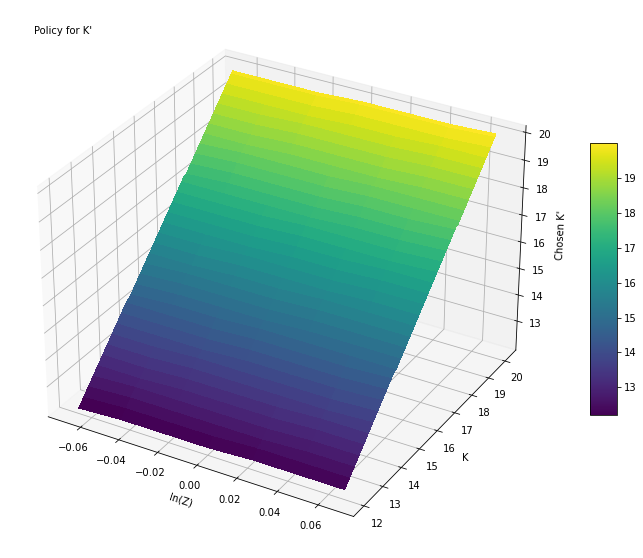

In [14]:
# Plot the figure of policy function
#Plotting the policy function for chosen k
def plot_k_policy(gridk, gridz, policy):
    #Rearranging values for plotting
    plot_k, plot_z = np.meshgrid(gridk, gridz)
    plot_pol = np.concatenate(policy, axis=None).reshape((len(gridk),len(gridz))).transpose()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14,10))
    # fig = plt.figure(figsize =(14, 9)) 
    # ax = plt.axes(projection ='3d')
    surf = ax.plot_surface(Y = plot_k, X = plot_z, Z = plot_pol, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.set_xlabel('ln(Z)')
    ax.set_ylabel('K')
    ax.set_zlabel('Chosen K\'')
    ax.text2D(0.05, 0.95, "Policy for K'", transform=ax.transAxes)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    
plot_k_policy(gridk, gridz, policy)

(f) Now solve the model using Howard's improvement algorithm. Iterate 20 times in the policy function before updating your value function. Report the number of value function iteration, the time it takes to find the optimal value function, plot the figure of the policy function and calculate Euler Errors.

In [20]:
#Running the Value Function Iteration algorithm with Howard's improvement
rbc.value_function_iteration(tol=1e-4, showlog=False, howard=True)
policyh = rbc.get_policy()

Converged in 33 iterations
Time elapsed: 17.176826000213623 seconds.


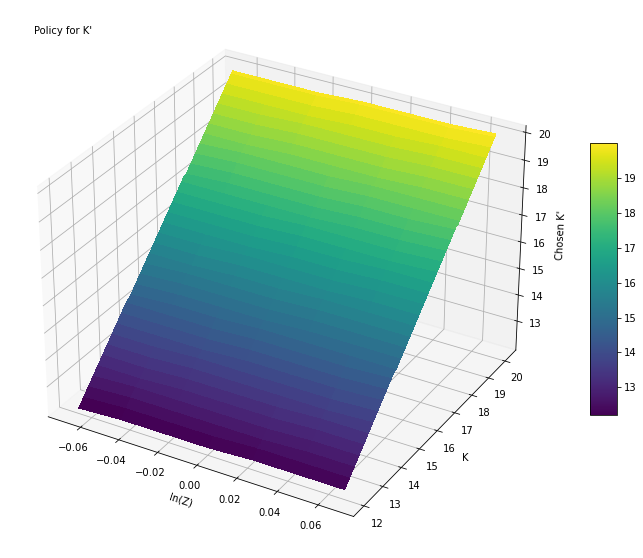

In [16]:
plot_k_policy(gridk, gridz, policyh)

(g) Calculate and report the first and second moments of consumption, hours worked, capital, investment and output.

In [21]:
s0 = len(gridz) // 2
moments = rbc.moments(100, s0, gridz, pi, 20)
moments

{'mean_c': 1.0227143844829842,
 'mean_h': 0.3329892479981079,
 'mean_k': 15.895069137491113,
 'mean_I': 0.1914522411595648,
 'mean_y': 1.2141666256425487,
 'var_c': 0.00013480094746974656,
 'var_h': 6.4732836291976375e-06,
 'var_k': 0.007651406557209067,
 'var_I': 0.0001791085661108032,
 'var_y': 0.00028916680764141554}

(h) Try to summarize what you learnt in this question.


## 3. Occupational Choice. 

Consider a model with the following timing: agents draw an entrepreneurial productivity $z \sim \Gamma(z)$, and choose between working for a wage $w$ or to be an entrepreneur and produce a consumption good $(y)$ with the following technology:
$$
y=z k^{\alpha} l^{\theta}, \quad \alpha+\theta<1 .
$$
In the next period productivity $z$ remains the same with probability $\gamma$, and with probability $(1-\gamma)$ agents draw another productivity, $z^{\prime} \sim \Gamma(z)$. The output price is normaized to one. Agents choose between consumption and savings (buy an asset $a^{\prime}$ with return $r$ ). $^{1}$ The distribution of $z$ follows:

Distribution $\Gamma(z)$

\begin{tabular}{c|c}
$z_{i}$ & $\operatorname{Prob}\left(z_{i}\right)$ \\
\hline 1 & $0.48782122$ \\
$1.6855801$ & $0.31137317$ \\
$2.3711602$ & $0.09711874$ \\
$3.0567403$ & $0.04150281$ \\
$3.7423204$ & $0.06218406$
\end{tabular}

Preferences: Use the following utility function:
$$
\begin{array}{c}
U(c)=\sum_{t=0}^{\infty} \beta^{t} u\left(c_{t}\right) \\
u(c)=\frac{c^{1-\epsilon}}{1-\epsilon}
\end{array}
$$
Calibration $\alpha=0.33, \theta=0.45, \epsilon=2, \beta=0.94$ and $\gamma=0.89$.

(a) Write individuals recursive problem.

(b) Considering $w=3$ and $r=0.06$ plot the occupational choice map $^{2}$. What is the relation between the asset holdings and the occupational choice of the agent?

(c) Write a code that solves the dynamic problem. Use $n=500$ values for the grid of assets and let $\bar{a}=500$ be the upper bound of the asset grid. Plot the policy function for the asset holdings.

(d) Now suppose agents are financially constrained, that is, $k \leq \lambda a$, where $\lambda=1.5$ is a parameter indicating financial market frictions. Rewrite individuals recursive problem considering the financial constraint and provide an intuition for this inequality.

(e) Plot the occupational choice map for this economy.

(f) Write a code that solves the dynamic problem. Plot the policy function for asset holdings and compare to the previous question.

(g) (Extra) Compute and plot the stationary distribution of this economy.

(h) (Extra) Let $G(a, z)$ be the stationary distribution of states in our economy. Write the market clearing conditions for this model.